<a href="https://colab.research.google.com/github/Nishil2009/Data-anlaytics-course/blob/main/Regression_assign_nishil.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. What is Simple Linear Regression?

-> Simple Linear Regression is a statistical method that models the relationship between two variables:

Independent variable (X)

Dependent variable (Y)
It assumes a linear relationship:

Y = β₀ + β₁·X + ε

2. What are the Key Assumptions of Simple Linear Regression?

-Linearity: Relationship between X and Y is linear.

-Independence: Observations are independent of each other.

-Homoscedasticity: Constant variance of residuals across values of X.

-Normality of Errors: Residuals should be normally distributed.

-No multicollinearity (in simple regression, not applicable since there's only one X).

3. What is Heteroscedasticity, and Why Is It Important?

-> Heteroscedasticity occurs when the variance of residuals (errors) is not constant across levels of the independent variable.

* Why important?

-Violates the assumption of constant error variance → leads to inefficient, biased estimates of coefficients and incorrect inference (e.g., wrong p-values, confidence intervals).

* How to address it?

-Apply data transformations (e.g., log transformation).

-Use robust standard errors.

-Employ weighted least squares regression.

4. What is Multiple Linear Regression?

Extends Simple Linear Regression by including multiple independent variables (X₁, X₂, ... Xₙ):

Y = β₀ + β₁·X₁ + β₂·X₂ + ... + βₙ·Xₙ + ε

It is basically used to model the combined effect of multiple factors on the dependent variable.

5. What is Polynomial Regression, and How Does It Differ from Linear Regression?

-> Polynomial Regression models a non-linear relationship by including polynomial terms of the independent variable:

Y = β₀ + β₁·X + β₂·X² + ... + βₖ·Xᵏ + ε

* How does it differ from Linear Regression:

- Linear Regression assumes linearity in parameters.
- Polynomial Regression allows curves by fitting powers of X.





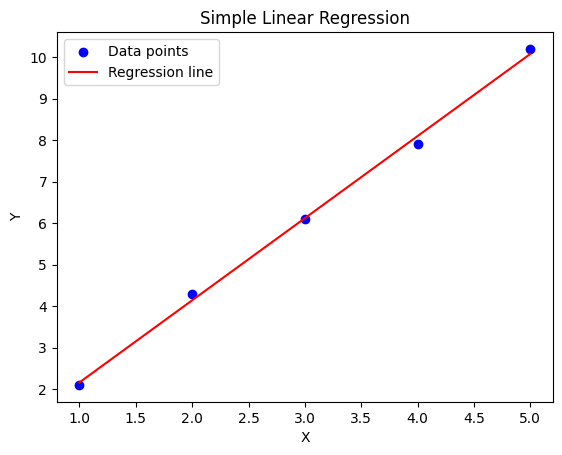

In [1]:
# 6. Simple Linear Regression Python Implementation

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Data
X = np.array([1, 2, 3, 4, 5]).reshape(-1, 1)
Y = np.array([2.1, 4.3, 6.1, 7.9, 10.2])

# Model fitting
model = LinearRegression()
model.fit(X, Y)

# Predict values
Y_pred = model.predict(X)

# Plot
plt.scatter(X, Y, color='blue', label='Data points')
plt.plot(X, Y_pred, color='red', label='Regression line')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Simple Linear Regression')
plt.legend()
plt.show()

In [2]:
#7. Multiple Linear Regression + VIF Calculation

import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Data
data = pd.DataFrame({
    'Area': [1200, 1500, 1800, 2000],
    'Rooms': [2, 3, 3, 4],
    'Price': [250000, 300000, 320000, 370000]
})

X = data[['Area', 'Rooms']]
Y = data['Price']

# Add constant for statsmodels
X_const = sm.add_constant(X)

# Fit model
model = sm.OLS(Y, X_const).fit()
print(model.summary())

# Calculate VIF
vif_data = pd.DataFrame()
vif_data['Feature'] = X_const.columns
vif_data['VIF'] = [variance_inflation_factor(X_const.values, i) for i in range(X_const.shape[1])]
print(vif_data)

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                     351.0
Date:                Sun, 14 Sep 2025   Prob (F-statistic):             0.0377
Time:                        11:50:39   Log-Likelihood:                -35.242
No. Observations:                   4   AIC:                             76.48
Df Residuals:                       1   BIC:                             74.64
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.032e+05   9488.293     10.872      0.0

/usr/local/lib/python3.12/dist-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 4 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


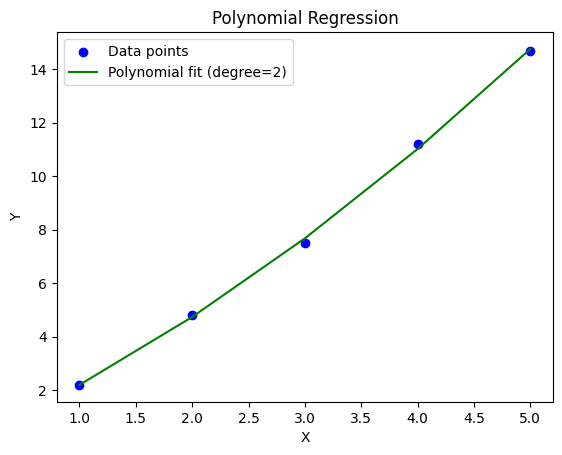

In [3]:
#8. Polynomial Regression Implementation

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Data
X = np.array([1, 2, 3, 4, 5]).reshape(-1, 1)
Y = np.array([2.2, 4.8, 7.5, 11.2, 14.7])

# Transform input to polynomial features
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

# Fit model
model = LinearRegression()
model.fit(X_poly, Y)
Y_pred = model.predict(X_poly)

# Plot
plt.scatter(X, Y, color='blue', label='Data points')
plt.plot(X, Y_pred, color='green', label='Polynomial fit (degree=2)')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Polynomial Regression')
plt.legend()
plt.show()

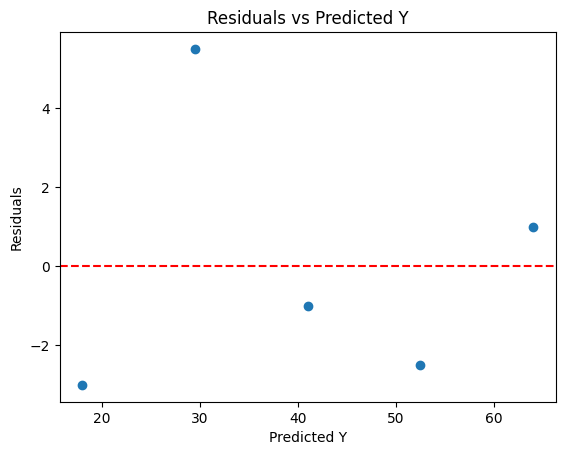

In [4]:
#9. Residuals Plot + Heteroscedasticity

import matplotlib.pyplot as plt

# Data
X = np.array([10, 20, 30, 40, 50]).reshape(-1, 1)
Y = np.array([15, 35, 40, 50, 65])

# Fit simple linear model
model = LinearRegression()
model.fit(X, Y)
Y_pred = model.predict(X)

# Calculate residuals
residuals = Y - Y_pred

# Plot residuals
plt.scatter(Y_pred, residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Y')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Y')
plt.show()

#As residuals are randomly scattered therefore, Homoscedasticity is fine.

10. Addressing Heteroscedasticity & Multicollinearity in Real-World Scenario


Heteroscedasticity:
1. Perform log transformation of target (e.g., log(Price)) or independent variables.
2. Use weighted least squares regression or robust standard errors.

Multicollinearity:
1. Calculate VIF → Remove variables with high VIF.
2. Apply Principal Component Analysis (PCA) to reduce dimensionality.
3. Use Ridge or Lasso regression (regularization helps handle multicollinearity).

By following these steps, model stability improves and inferences become reliable.